In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
file_name='C:/Users/benne/Desktop/Project/tuh_eeg_epilepsy/v1.0.0/edf/epilepsy/01_tcp_ar/003/00000355/s003_2013_01_04/00000355_s003_t000.edf'
raw = mne.io.read_raw_edf(file_name, preload=True, stim_channel='auto', verbose=False)

In [2]:
# what does our data look like?

print('Data type: {}\n\n{}\n'.format(type(raw), raw))
# print('{} \n'.format(raw))

# Get the sample rate
print('Sample rate:', raw.info['sfreq'], 'Hz')

# Get the size of the matrix
print('Size of the matrix: {}\n'.format(raw.get_data().shape))

# We can use the mne.info class to learn moure about the data.
print(raw.info)

Data type: <class 'mne.io.edf.edf.RawEDF'>

<RawEDF | 00000355_s003_t000.edf, 36 x 331250 (1325.0 s), ~91.0 MB, data loaded>

Sample rate: 250.0 Hz
Size of the matrix: (36, 331250)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2013-01-04 09:16:52 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
>


In [3]:
print('The actual data is just a matrix array!\n\n {}\n'.format(raw.get_data()))

The actual data is just a matrix array!

 [[ 1.35838116e-05  1.89243836e-05  1.99924980e-05 ...  3.50000000e-09
   3.50000000e-09  3.50000000e-09]
 [ 9.15876627e-06  1.26682850e-05  1.61778038e-05 ...  3.50000000e-09
   3.50000000e-09  3.50000000e-09]
 [-7.16812525e-06 -4.57413314e-06 -2.89566765e-06 ...  3.50000000e-09
   3.50000000e-09  3.50000000e-09]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]



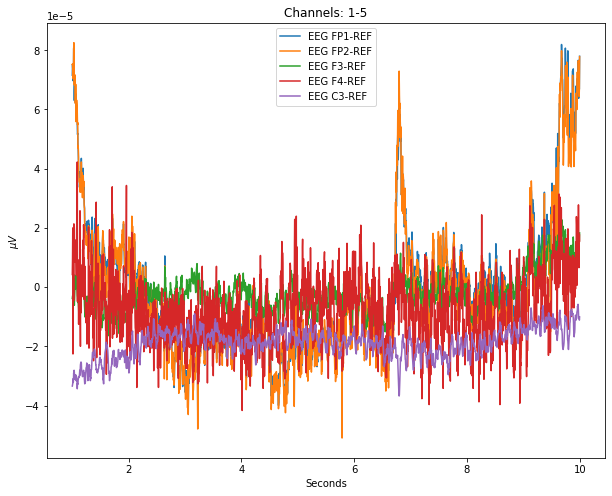

In [4]:
# Extract data from the first 5 electrods , from 1 s to 3 s. 
sfreq = raw.info['sfreq']
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-5');
plt.legend(raw.ch_names[:5]);

In [5]:
# Apply band-pass filter
#The filter covers frequences from 7Hz to 30hz
raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

<RawEDF | 00000355_s003_t000.edf, 36 x 331250 (1325.0 s), ~91.0 MB, data loaded>

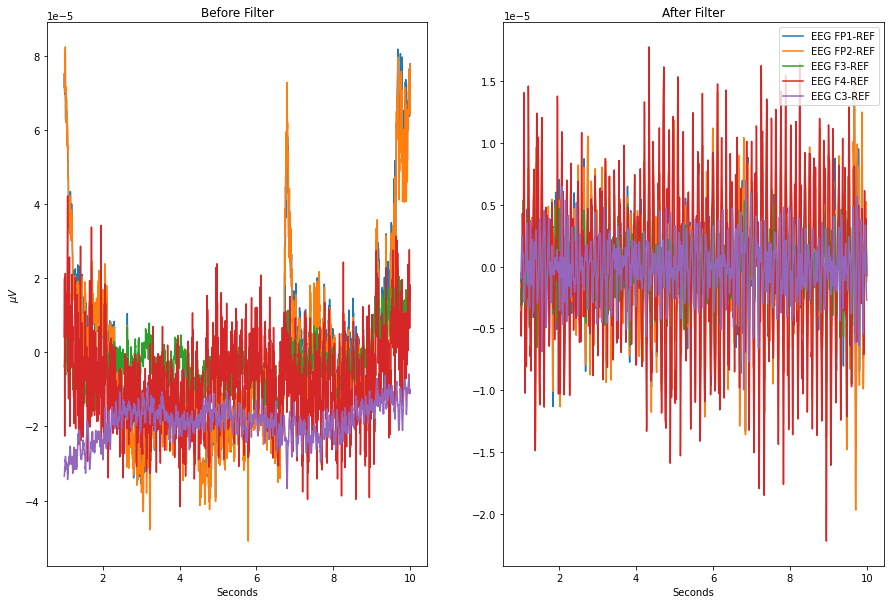

In [6]:
data_f, times_f = raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10))

ax1.plot(times, data.T);
ax1.set_title('Before Filter')
ax1.set_xlabel('Seconds')
ax1.set_ylabel('$\mu V$')

ax2.plot(times_f, data_f.T);
ax2.set_title('After Filter')
ax2.set_xlabel('Seconds')

plt.legend(raw.ch_names[:5], loc=1);
# plt.tight_layout()

<ipython-input-7-997daa49267d>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmax=np.inf, fmax=125)


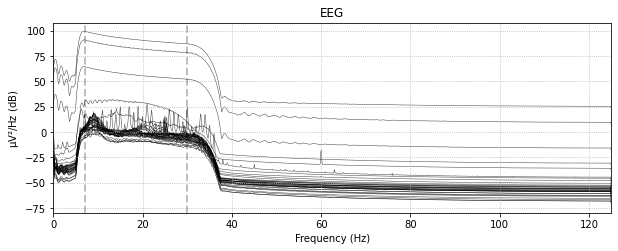

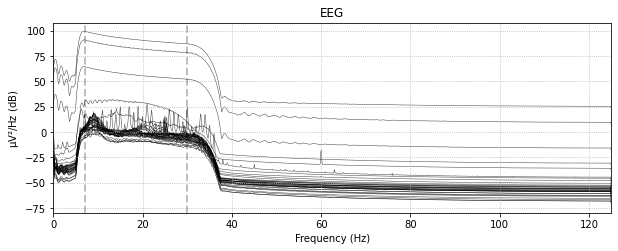

In [7]:
# %matplotlib qt
# Visualizing the signal 
raw.plot_psd(tmax=np.inf, fmax=125)

In [8]:
# Putting a sample of our data in a dataframe

raw_df = raw.to_data_frame()
raw_df.head()

,time,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,...,EEG 27-REF,EEG 28-REF,EEG 29-REF,EEG 30-REF,EEG T1-REF,EEG T2-REF,PHOTIC-REF,IBI,BURSTS,SUPPR
0,0,-3.282253e-15,-3.679299e-15,4.499863e-16,-4.235165e-16,2.117582e-15,3.388132e-15,4.235165e-16,-4.235165e-16,4.235165e-15,...,-2.541099e-15,5.505714e-15,5.082198e-15,8.470329e-16,4.235165e-15,1.694066e-15,0.0,0.0,0.0,0.0
1,4,1.853257e+00,1.558872e+00,1.494386e+00,6.700428e+00,-3.710046e-01,6.865293e-01,-1.797188e+00,9.274061e-02,-1.275895e+00,...,2.736120e-01,3.155389e+00,5.311717e-01,-6.065054e-01,1.378798e+00,1.116243e+00,0.0,0.0,0.0,0.0
2,8,3.157789e+00,2.600401e+00,2.552583e+00,1.127596e+01,-7.900922e-01,5.494661e-01,-3.357110e+00,-1.627632e-01,-2.530714e+00,...,1.968610e-02,5.370940e+00,7.364041e-01,-1.020654e-01,2.059114e+00,1.789827e+00,0.0,0.0,0.0,0.0
3,12,3.585199e+00,2.831596e+00,2.891742e+00,1.256158e+01,-1.259498e+00,-7.270335e-01,-4.497825e+00,-9.455634e-01,-3.756401e+00,...,-8.583543e-01,6.165909e+00,4.484233e-01,2.114461e+00,1.664519e+00,1.714954e+00,0.0,0.0,0.0,0.0
4,16,3.150701e+00,2.308914e+00,2.476637e+00,1.083573e+01,-1.717540e+00,-2.734553e+00,-5.130456e+00,-2.179635e+00,-4.959363e+00,...,-1.894112e+00,5.725273e+00,-2.248144e-01,5.808206e+00,2.969519e-01,8.359524e-01,0.0,0.0,0.0,0.0


Extracting EDF parameters from C:\Users\benne\Desktop\Project\tuh_eeg_epilepsy\v1.0.0\edf\epilepsy\01_tcp_ar\003\00000355\s003_2013_01_04\00000355_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\benne\Desktop\Project\tuh_eeg_epilepsy\v1.0.0\edf\epilepsy\01_tcp_ar\003\00000355\s003_2013_01_04\00000355_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


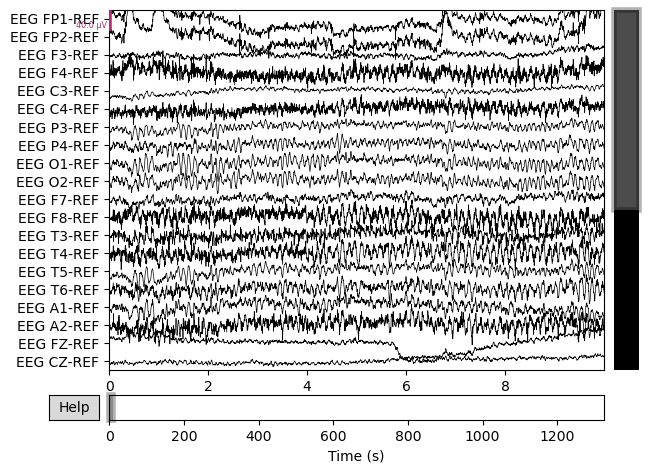

In [9]:
data = mne.io.read_raw_edf(file_name)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names
raw=mne.io.read_raw_edf(file_name)
%matplotlib qt5
raw.plot()

In [10]:
#getting our full data 
print(raw_data)
print(raw_data.shape)

[[ 1.35838116e-05  1.89243836e-05  1.99924980e-05 ...  3.50000000e-09
   3.50000000e-09  3.50000000e-09]
 [ 9.15876627e-06  1.26682850e-05  1.61778038e-05 ...  3.50000000e-09
   3.50000000e-09  3.50000000e-09]
 [-7.16812525e-06 -4.57413314e-06 -2.89566765e-06 ...  3.50000000e-09
   3.50000000e-09  3.50000000e-09]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(36, 331250)


In [11]:
#Getting our electrods 
import pyedflib
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signals=[]
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    signals.append(f.readSignal(i))
f.close()
print(signal_labels)

['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG 26-REF', 'EEG 27-REF', 'EEG 28-REF', 'EEG 29-REF', 'EEG 30-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']


In [12]:
def tuh_data_load(data_file, selected_channels=[]):

    try:
        # use the reader to get an EdfReader file
        f = pyedflib.EdfReader(data_file)

        # get the names of the signals
        channel_names = f.getSignalLabels()
        # get the sampling frequencies of each signal
        channel_freq = f.getSampleFrequencies()
        
        # get a list of the EEG channels
        if len(selected_channels) == 0:
            selected_channels = channel_names

        # make an empty file of 0's
        sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
        # for each of the channels in the selected channels
        for i, channel in enumerate(selected_channels):
            try:
              # add the channel data into the array
              sigbufs[:, i] = f.readSignal(channel_names.index(channel))
            
            except:
              ValueError
              # This happens if the sampling rate of that channel is 
              # different to the others.
              # For simplicity, in this case we just make it na.
              sigbufs[:, i] = np.nan


        # turn to a pandas df and save a little space
        df = pd.DataFrame(sigbufs, columns = selected_channels)#.astype('float32')

        # get equally increasing numbers upto the length of the data depending
        # on the length of the data divided by the sampling frequency
        index_increase = np.linspace(0,
                                      len(df)/channel_freq[0],
                                      len(df), endpoint=False)

        # round these to the lowest nearest decimal to get the seconds
        #seconds = np.floor(index_increase).astype('uint16')

        seconds = index_increase
        
        # make a column the timestamp
        df['Time'] = seconds

        # make the time stamp the index
        df = df.set_index('Time')

        # name the columns as channel
        df.columns.name = 'Channel'

        return df,channel_freq[0]
    
    except:
        OSError
        return pd.DataFrame(), None



In [13]:
def mne_object(data, freq):

  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw

seiz_df, seiz_freq = tuh_data_load('C:/Users/benne/Desktop/Project/tuh_eeg_epilepsy/v1.0.0/edf/epilepsy/01_tcp_ar/003/00000355/s003_2013_01_04/00000355_s003_t000.edf')

tuh_mne = mne_object(seiz_df,seiz_freq)

plot = tuh_mne.plot(scalings = dict(eeg=5e-5),
                    start=0,
                    duration = 10,
                    show =True,
                    show_scrollbars=False)

Creating RawArray with float64 data, n_channels=36, n_times=331250
    Range : 0 ... 331249 =      0.000 ...  1324.996 secs
Ready.




<h5> both these fctions have been used to realize a filter between 0 and 40 hz and to visualize the entirety of our signal </h5>

In [14]:
sfreq = tuh_mne.info['sfreq']
l_freq = None
h_freq = 60
method = 'fir'
fir_design = 'firwin2'

filter_params = mne.filter.create_filter(tuh_mne.get_data(), sfreq,
                                         l_freq=l_freq, h_freq=h_freq, 
                                         fir_design=fir_design)

filt_data = tuh_mne.filter(l_freq, h_freq,
                           method=method, 
                           fir_design=fir_design)

plot = filt_data.plot(scalings = dict(eeg=5e-5),
                      start = 0,
                      duration = 10,
                      show =True,
                      show_scrollbars=False)

Setting up low-pass filter at 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 111 samples (0.444 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 111 samples (0.444 sec)



In [15]:
print(filt_data.info)
data2=filt_data.get_data()
data2=np.nan_to_num(data2)  # We want to get rid of our nan values with this fction
print(data2)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 60.0 Hz
 meas_date: unspecified
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
>
[[ 1.35844818e-05  1.83833454e-05  2.02466843e-05 ...  3.50017268e-09
   3.50017268e-09  3.50017268e-09]
 [ 9.15921813e-06  1.32332254e-05  1.47062839e-05 ...  3.50017268e-09
   3.50017268e-09  3.50017268e-09]
 [-7.16847890e-06 -4.54809216e-06 -3.03590225e-06 ...  3.50017268e-09
   3.50017268e-09  3.50017268e-09]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Reading 0 ... 331249  =      0.000 ...  1324.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)

Fitting ICA to data using 36 channels (please be patient, this may take a while)
Selecting by number: 15 components


<ipython-input-16-866138562a71>:7: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.3) and smallest (3e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(filt_raw)


Fitting ICA took 17.1s.
Reading 0 ... 331249  =      0.000 ...  1324.996 secs...
Creating RawArray with float64 data, n_channels=15, n_times=331250
    Range : 0 ... 331249 =      0.000 ...  1324.996 secs
Ready.
Channels marked as bad: none
Channels marked as bad: none
Channels marked as bad: none


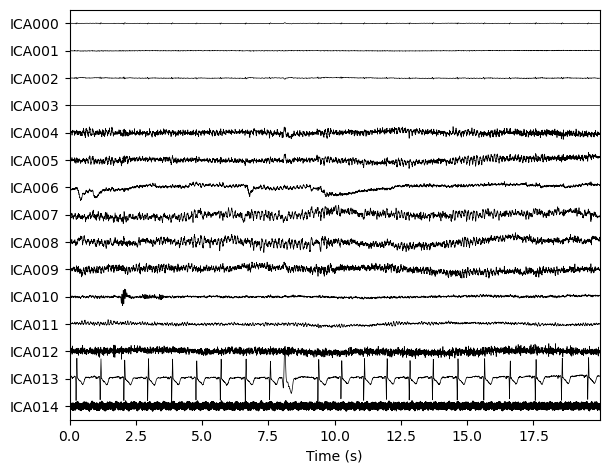

In [16]:
picks = mne.pick_types(raw.info, emg=True, eeg=True,
                       exclude='bads')
print(picks)
filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=40, h_freq=5)
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(filt_raw)
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 36 PCA components


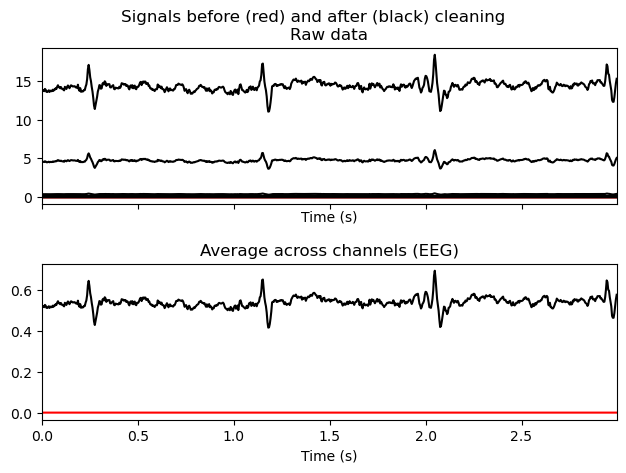

In [18]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')